In [2]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft
import tqdm

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [3]:
# mpl.use("pgf")  # to display graphs remove this line
mpl.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
line = 0.75

In [40]:
# general settings for signal and noise
sample_freq = 1e6  # in Hz
length = 0.2  # in s
signal_power = 1.0  # in dB
noise_power = 1.0  # in dB

# create the signal (the 'soft speaker' kind)
wm = ss.WirelessMicrophone(f_sample=sample_freq, t_sec=length, seed=None)
sig = wm.soft(f_center=-1e5, power=signal_power, dB=True)

# create the noise
wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length, seed=None)
noise = wgn.signal(power=noise_power, dB=True)

# ensure noise and signal have same length (and create global variable 'num_samples')
assert wm.num_samples == wgn.num_samples
num_samples = wm.num_samples

# create actual signal ('both') comprising of signal and additive white Gaussian noise (AWGN)
both = sig + noise

# print some info about signal and noise
print('Signal power: %.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:  %.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:          %.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Num samples:  %d' % (num_samples))

# ensure that Parseval's theorem holds
ss.util.check_parseval(both, length, sample_freq)

Signal power: 1.00 dB
Noise power:  0.99 dB
SNR:          0.01 dB
Num samples:  200000


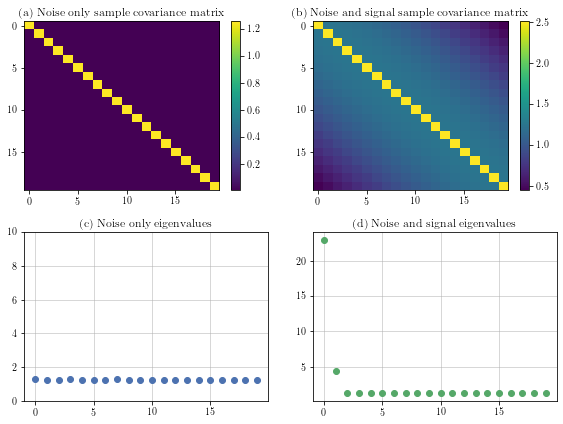

In [47]:
cov_size = 20

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

mat_noise = ss.eigen_detector.corr(x=noise, l=cov_size)
img = axs[0, 0].imshow(np.abs(mat_noise), aspect='auto')
axs[0, 0].set_title(r'(a) Noise only sample covariance matrix')
cbar = plt.colorbar(img, ax=axs[0, 0])
axs[0, 0].set_xticks([0,5,10,15])
axs[0, 0].set_yticks([0,5,10,15])
axs[0, 0].set_xlim([-0.5,19.5])
axs[0, 0].set_ylim([19.5,-0.5])

mat_both = ss.eigen_detector.corr(x=both, l=cov_size)
img = axs[0, 1].imshow(np.abs(mat_both), aspect='auto')
axs[0, 1].set_title(r'(b) Noise and signal sample covariance matrix')
cbar = plt.colorbar(img, ax=axs[0, 1])
axs[0, 1].set_xticks([0,5,10,15])
axs[0, 1].set_yticks([0,5,10,15])
axs[0, 1].set_xlim([-0.5,19.5])
axs[0, 1].set_ylim([19.5,-0.5])

noise_eigvals = np.abs(linalg.eigvals(mat_noise))
axs[1, 0].plot(noise_eigvals, 'o', alpha=1., aa=True)
axs[1, 0].set_title(r'(c) Noise only eigenvalues')
axs[1, 0].grid(linewidth=0.5)
axs[1, 0].set_ylim([0, 10])

both_eigvals = np.abs(linalg.eigvals(mat_both))
axs[1, 1].plot(both_eigvals, 'o', c='C1', alpha=1., aa=True)
axs[1, 1].set_title(r'(d) Noise and signal eigenvalues')
axs[1, 1].grid(linewidth=0.5)

plt.tight_layout()
plt.savefig('out/chap5/eigenvalue.pdf')